# Lab 01 : MLP -- demo

# Understanding the training loop

In [1]:
import sys, os

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data

In [3]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()

train_data = torch.load(data_path+'mnist/train_data.pt')
train_label = torch.load(data_path+'mnist/train_label.pt')
test_data = torch.load(data_path+'mnist/test_data.pt')

### Make a three layer net class

In [4]:
class three_layer_net(nn.Module):
    
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(three_layer_net, self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1, bias = False)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2, bias = False)
        self.layer3 = nn.Linear(hidden_size2, output_size, bias = False)
        
    def forward(self, x):
        
        y = self.layer1(x)
        y_hat = F.relu(y)
        z = self.layer2(y_hat)
        z_hat = F.relu(z)
        scores = self.layer3(z_hat)
        
        return scores

### Build the net

In [5]:
net = three_layer_net(784, 50, 50, 10)
print(net)

three_layer_net(
  (layer1): Linear(in_features=784, out_features=50, bias=False)
  (layer2): Linear(in_features=50, out_features=50, bias=False)
  (layer3): Linear(in_features=50, out_features=10, bias=False)
)


### Choose the criterion, optimizer, learning rate, and batch size

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
bs = 200

### Train the network on the train set (process 5000 batches)

In [8]:
for iter in range(1, 5000):
    
    # Set dL/dU, dL/dV, dL/dW to be filled with zeros
    optimizer.zero_grad()
    
    # create a minibatch
    indices = torch.LongTensor(bs).random_(0, 60000)
    minibatch_data = train_data[indices]
    minibatch_label = train_label[indices]
    
    # reshape the minibatch
    inputs = minibatch_data.view(bs, 784)
    
    # tell Pytorch to start tracking all operations that will be done on "inputs" 
    inputs.requires_grad_()
    
    # forward the minibatch through the net
    scores = net(inputs)
    
    # compute the average of the losses of the data points in the minibatch
    loss = criterion(scores, minibatch_label)
    
    # backward pass to compute dL/dU, dL/dV, and dL/dW
    loss.backward()
    
    # do one step of stochastic gradient descent:
    # U=U-lr(dL/dU), V=V-lr(dL/dV), W=W-lr(dL/dW)
    optimizer.step()

### Choose image at random from the test set and see how good/bad are the predictions

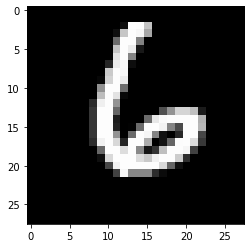

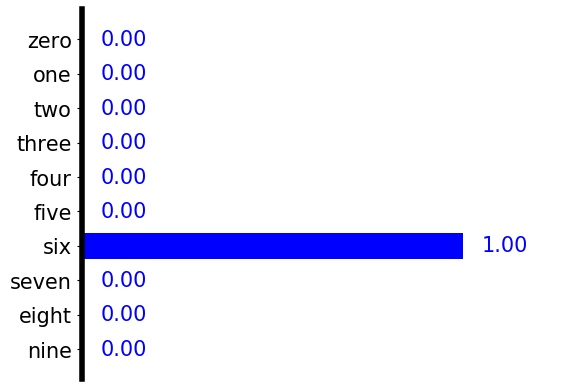

In [10]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# display the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1, 784))
prob = F.softmax(scores, dim=1)

utils.show_prob_mnist(prob)